In [1]:
# project: p1
# submitter: xhuang438
# partner: none
# hours: 8

In [2]:
# import statements
import copy
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
from subprocess import check_output
import time

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (4<minimum) or (4>maximum) # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix_match = (word.lower()[-5:]=="esque")# .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
#Q4
def check_sum(x = 0, y = 0, sum = 0):
    return x + y == sum
check_sum(0.1,0.2,0.3)

False

In [7]:
#Q5
check_sum(-1,1)

True

In [8]:
#Q6
x = 4
if (x%2 == 1):
    status = "odd"
elif (x%2 == 0):
    status = "even"
else:
    status = "non-integer"
status

'even'

In [9]:
#Q7
nums = [3, 4, 1, 6]
def smart_sum(list):
    total = 0
    for num in list:
        if(num < 0):
            continue
        total = total + num
        if(total > 20):
            break
    return total
smart_sum(nums)

14

In [10]:
#Q8
smart_sum([2, 1, -11, 3, 15, -1, 8, 2])

21

In [11]:
#Q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"w":6, "x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'w': 6, 'x': 3, 'y': 1, 'z': 7}]]

In [12]:
#Q10
rows[0][4]["x"]

8

In [13]:
#Q11
v2 = copy.copy(rows)
v2[0] = 404    # first change NOT reflected
v2[1][1] = 404 # second change reflected
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'w': 6, 'x': 3, 'y': 1, 'z': 7}]]

In [14]:
#Q12
total = 0
for i in range(0,3):
    total += rows[i][header.index("B")]
total

412

In [15]:
#Q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'w': 6, 'x': 3, 'y': 1, 'z': 7}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [16]:
#Q14
f = open("usd.json")
data = json.load(f)
f.close()
round(data.get("cad").get("rate")*1000,2)

1344.97

In [17]:
#Q15
def divide(a,b):
    try:
        return a/b
    except ZeroDivisionError:
        return float("nan")
divide (3, 2)

1.5

In [18]:
#Q16
divide(0,0)

nan

In [19]:
#Q17
file = os.listdir("/home/jehrenstoneman/CS320-FA23/p1/home-computers")
pc2017 = pd.read_csv("/home/jehrenstoneman/CS320-FA23/p1/home-computers/ACSDT5Y2017.B28001-Data.csv").set_index("NAME").tail(-1)
pc2018 = pd.read_csv("/home/jehrenstoneman/CS320-FA23/p1/home-computers/ACSDT5Y2018.B28001-Data.csv").set_index("NAME").tail(-1)
pc2019 = pd.read_csv("/home/jehrenstoneman/CS320-FA23/p1/home-computers/ACSDT5Y2019.B28001-Data.csv").set_index("NAME").tail(-1)
pc2020 = pd.read_csv("/home/jehrenstoneman/CS320-FA23/p1/home-computers/ACSDT5Y2020.B28001-Data.csv").set_index("NAME").tail(-1)
pc2021 = pd.read_csv("/home/jehrenstoneman/CS320-FA23/p1/home-computers/ACSDT5Y2021.B28001-Data.csv").set_index("NAME").tail(-1)

pc = [] # each year's csv as values

pc.append(pc2017)
pc.append(pc2018)
pc.append(pc2019)
pc.append(pc2020)
pc.append(pc2021)

years = {}
year = []  # year as keys
temp = []
for item in file:
    CSVfile = item.split(".")[-1]=="csv"
    if CSVfile:
        temp.append(item)
for item in temp:
    year.append(item.split(".")[0][-4:])
year.sort()
for key in year:
    for val in pc:
        years[key] = val
        pc.remove(val)
        break
        
result = list(years.keys())
[eval(i) for i in result]

[2017, 2018, 2019, 2020, 2021]

In [20]:
#Q18
int(years['2021'].loc['Wisconsin']['B28001_001E'])

2401818

In [21]:
#Q19
pc2021['B28001_011E'] = pc2021['B28001_011E'].astype('int')
pc2021['B28001_011E'].sum()

8902093

In [22]:
#Q20
pc2021['B28001_011M'] = pc2021['B28001_011M'].astype('int')
(pc2021['B28001_011M'] / pc2021['B28001_011E']).max()

0.07836701790752577

In [23]:
#Q21
pc2021['B28001_001E'] = pc2021['B28001_001E'].astype('int')
keyList = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
ans = {}
for i in keyList:
    ans[i] = None

Illinois = pc2021.loc["Illinois"]['B28001_011E'] / pc2021.loc["Illinois"]['B28001_001E'] * 100
Indiana = pc2021.loc["Indiana"]['B28001_011E'] / pc2021.loc["Indiana"]['B28001_001E'] * 100
Iowa = pc2021.loc["Iowa"]['B28001_011E'] / pc2021.loc["Iowa"]['B28001_001E'] * 100
Michigan = pc2021.loc["Michigan"]['B28001_011E'] / pc2021.loc["Michigan"]['B28001_001E'] * 100
Minnesota = pc2021.loc["Minnesota"]['B28001_011E'] / pc2021.loc["Minnesota"]['B28001_001E'] * 100
Wisconsin = pc2021.loc["Wisconsin"]['B28001_011E'] / pc2021.loc["Wisconsin"]['B28001_001E'] * 100

ans['Illinois'] = Illinois
ans['Indiana'] = Indiana
ans['Iowa'] = Iowa
ans['Michigan'] = Michigan
ans['Minnesota'] = Minnesota
ans['Wisconsin'] = Wisconsin

ans

{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

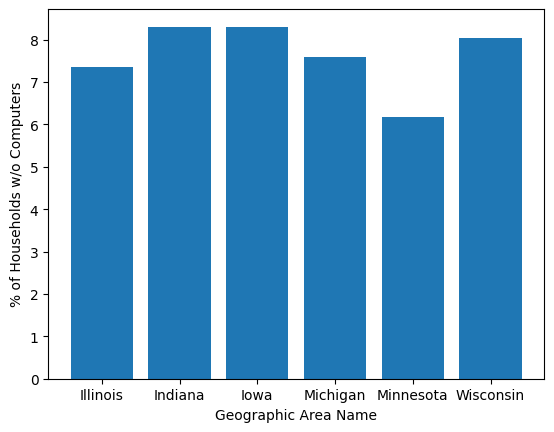

In [24]:
#Q22
# df = pd.DataFrame({'Geographic Area Name':['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin'], 
#                    '% of Households w/o Computers':[Illinois, Indiana, Iowa, Michigan, Minnesota, Wisconsin]})
# df.plot.bar(x = 'Geographic Area Name', y = '% of Households w/o Computers', rot=0)
plt.bar(*zip(*ans.items()))
plt.xlabel("Geographic Area Name")
plt.ylabel("% of Households w/o Computers")
plt.show()

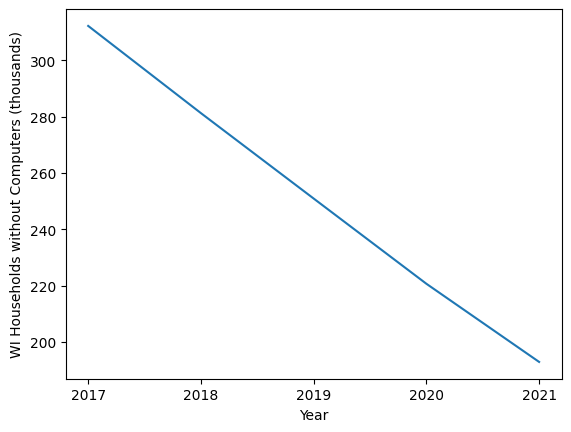

In [25]:
#Q23
no_pc2017 = int(pc2017.loc["Wisconsin"]["B28001_011E"])/1000
no_pc2018 = int(pc2018.loc["Wisconsin"]["B28001_011E"])/1000
no_pc2019 = int(pc2019.loc["Wisconsin"]["B28001_011E"])/1000
no_pc2020 = int(pc2020.loc["Wisconsin"]["B28001_011E"])/1000
no_pc2021 = int(pc2021.loc["Wisconsin"]["B28001_011E"])/1000
year = ["2017", "2018", "2019", "2020", "2021"]
no_pc = [no_pc2017, no_pc2018, no_pc2019, no_pc2020, no_pc2021]
plt.plot(year, no_pc)
plt.xlabel("Year")
plt.ylabel("WI Households without Computers (thousands)")
plt.show()

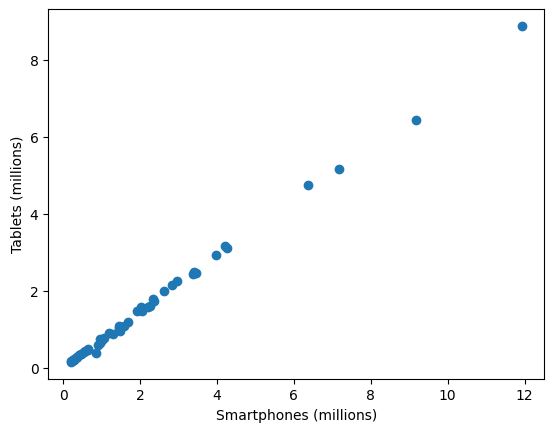

In [26]:
#Q24
pc2021['B28001_005E'] = pc2021['B28001_005E'].astype('int')
pc2021['B28001_007E'] = pc2021['B28001_007E'].astype('int')

pc2021smartphones = (pc2021['B28001_005E'] / 1e6).to_numpy()
pc2021tablets = (pc2021['B28001_007E'] / 1e6).to_numpy()

plt.scatter(pc2021smartphones,pc2021tablets)
plt.xlabel("Smartphones (millions)")
plt.ylabel("Tablets (millions)")
plt.show()

In [27]:
#Q25
check_output(["git","checkout","main"], cwd = "flask")
log = str(check_output(["git","log"], cwd = "flask"), encoding = "utf-8").split("\n")
log[0]

Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [28]:
#Q26
commits = []
for elem in log:
    if elem[:6] == "commit":
        commits.append(elem[7:])
commits[-10:]

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [29]:
#Q27
check_output(["git", "checkout", commits[-100]], cwd = "flask")
f = open("flask/README","r")
f.read()

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [30]:
#Q28
result = {}
check_output(["git","checkout","main"], cwd = "flask")
log = str(check_output(["git","log"], cwd = "flask"), encoding = "utf-8").split("\n")
for elements in log:
    if(("Merge pull request" in elements) and ("/" in elements)):
        index = elements.find("/")
        index2 = elements.find("from")
        if(elements[(index2 + 5) : index] not in result.keys()):
            result[elements[(index2 + 5) : index]] = 1
        else:
            result[elements[(index2 + 5) : index]] += 1
result = {key:value for (key, value) in result.items() if value >= 10}
result

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [31]:
#Q29
try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
msg.decode()

'ERROR: unknown command "instal" - maybe you meant "install"\n'

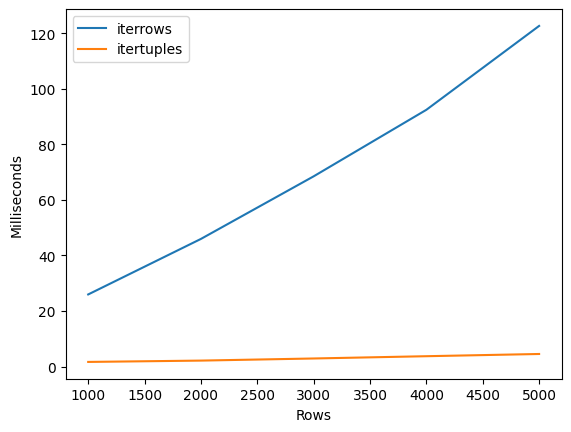

In [32]:
#Q30
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
num_rows = [*range(1000,5001,1000)]
runtimeiterrows = []
runtimeitertuples = []
for elements in num_rows:
    df = rand_df(elements)
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    runtimeiterrows.append((t1-t0)*1e3)

for elements in num_rows:
    df = rand_df(elements)
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    runtimeitertuples.append((t1-t0)*1e3)

times_df = pd.DataFrame(dtype=float)

for i in range(0, 5):
    times_df.at[num_rows[i],"iterrows"] = runtimeiterrows[i]
    times_df.at[num_rows[i],"itertuples"] = runtimeitertuples[i]
ans = times_df.plot.line()
ans.set_xlabel("Rows")
ans.set_ylabel("Milliseconds")
plt.show()

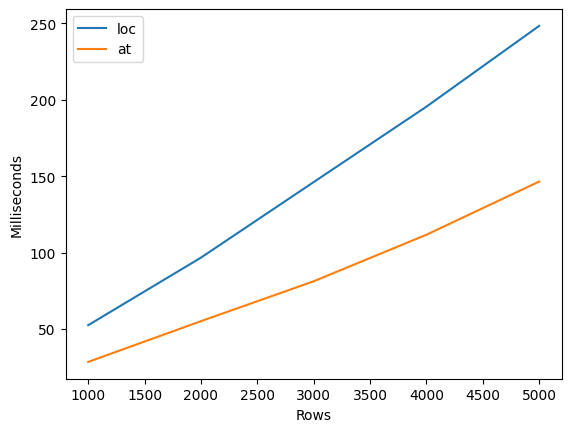

In [33]:
#Q31
runtimeloc = []
runtimeat = []

for elements in num_rows:
    df = rand_df(elements)
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    total
    t1 = time.time()
    runtimeloc.append((t1-t0)*1e3)

for elements in num_rows:
    df = rand_df(elements)
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    total
    t1 = time.time()
    runtimeat.append((t1-t0)*1e3)

times_df = pd.DataFrame(dtype=float)

for i in range(0, 5):
    times_df.at[num_rows[i],"loc"] = runtimeloc[i]
    times_df.at[num_rows[i],"at"] = runtimeat[i]
ans = times_df.plot.line()
ans.set_xlabel("Rows")
ans.set_ylabel("Milliseconds")
plt.show()

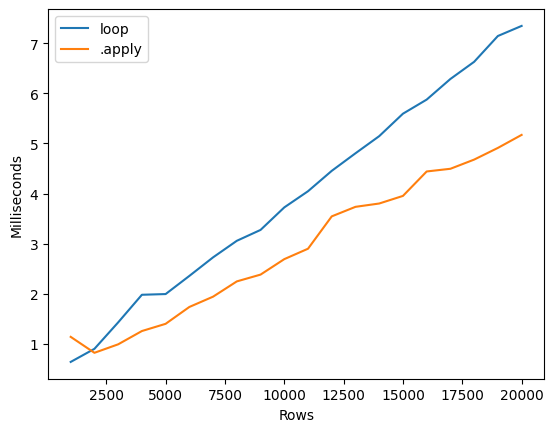

In [34]:
#Q32
num_rows_new = [*range(1000,20001,1000)]
def laugh(x):
    return "qwerty" * x
runtimeloop = []
runtimeapply = []
for elements in num_rows_new:
    df = rand_df(elements)
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    runtimeloop.append((t1-t0)*1e3)

for elements in num_rows_new:
    df = rand_df(elements)
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    runtimeapply.append((t1-t0)*1e3)

times_df = pd.DataFrame(dtype=float)

for i in range(0, 20):
    times_df.at[num_rows_new[i],"loop"] = runtimeloop[i]
    times_df.at[num_rows_new[i],".apply"] = runtimeapply[i]
ans = times_df.plot.line()
ans.set_xlabel("Rows")
ans.set_ylabel("Milliseconds")
plt.show()